# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')#series.label
print (xs[['d', 'f', 'h']], '\n')#select groups
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')#passi
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.166507
b    1.110157
c    0.421894
d    0.712059
e   -0.467253
dtype: float64
a         NaN
b    2.220314
c    0.843788
d    1.424117
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-10
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-11-9':'2020-11-11'], '\n') # Note - includes end time
#year-day-month

2020-09-11 14:45:00     7.247687
2020-09-12 14:45:00    10.579206
2020-09-13 14:45:00    10.460716
2020-09-14 14:45:00     8.701818
Freq: D, dtype: float64 

Series([], Freq: D, dtype: float64) 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df  #non serve mettere print



,A,B,C,D
2020-11-09 14:45:00,1.140409,-1.654270,-0.820787,-1.336590
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,-0.295801
2020-11-09 16:45:00,1.206200,0.002933,0.768687,-0.173571
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,-0.533547
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,-0.954847
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,-0.048859
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,-0.731858
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,0.313527
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,0.122755
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,-0.688078


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [12]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,1.140409,-1.654270,-0.820787,-1.336590
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,-0.295801
2020-11-09 16:45:00,1.206200,0.002933,0.768687,-0.173571
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,-0.533547
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,-0.954847


In [13]:
df.tail(4) #inizia dalla fine

,A,B,C,D
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,-0.731858
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,0.313527
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,0.122755
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,-0.688078


In [14]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.14040876, -1.6542702 , -0.8207873 , -1.33659007],
       [ 0.54282788, -0.38374225, -0.59639985, -0.29580083],
       [ 1.2061999 ,  0.00293251,  0.7686874 , -0.17357146],
       [-0.54251562, -0.72060968, -0.44094361, -0.53354689],
       [-0.91027677,  0.2003801 , -1.57629912, -0.95484651],
       [-1.81613719, -0.17013586,  2.10230717, -0.04885865],
       [-0.23078633, -1.66756969, -0.02969013, -0.73185773],
       [ 0.35540032, -0.88008894,  2.35601002,  0.31352738],
       [ 0.81517179,  0.86750278, -0.21152246,  0.12275501],
       [-0.77865681,  1.01049854, -2.45220129, -0.68807816]])

In [17]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.021836,-0.339510,-0.090084,-0.432687
std,0.995379,0.921870,1.499913,0.511332
min,-1.816137,-1.667570,-2.452201,-1.336590
25%,-0.719622,-0.840219,-0.764690,-0.720913
50%,0.062307,-0.276939,-0.326233,-0.414674
75%,0.747086,0.151018,0.569093,-0.080037
max,1.206200,1.010499,2.356010,0.313527


In [18]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,1.140409,0.542828,1.206200,-0.542516,-0.910277,-1.816137,-0.230786,0.355400,0.815172,-0.778657
B,-1.654270,-0.383742,0.002933,-0.720610,0.200380,-0.170136,-1.667570,-0.880089,0.867503,1.010499
C,-0.820787,-0.596400,0.768687,-0.440944,-1.576299,2.102307,-0.029690,2.356010,-0.211522,-2.452201
D,-1.336590,-0.295801,-0.173571,-0.533547,-0.954847,-0.048859,-0.731858,0.313527,0.122755,-0.688078


In [19]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,-1.336590,-0.820787,-1.654270,1.140409
2020-11-09 15:45:00,-0.295801,-0.596400,-0.383742,0.542828
2020-11-09 16:45:00,-0.173571,0.768687,0.002933,1.206200
2020-11-09 17:45:00,-0.533547,-0.440944,-0.720610,-0.542516
2020-11-09 18:45:00,-0.954847,-1.576299,0.200380,-0.910277
2020-11-09 19:45:00,-0.048859,2.102307,-0.170136,-1.816137
2020-11-09 20:45:00,-0.731858,-0.029690,-1.667570,-0.230786
2020-11-09 21:45:00,0.313527,2.356010,-0.880089,0.355400
2020-11-09 22:45:00,0.122755,-0.211522,0.867503,0.815172
2020-11-09 23:45:00,-0.688078,-2.452201,1.010499,-0.778657


In [20]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,-0.688078
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,-0.954847
2020-11-09 14:45:00,1.140409,-1.654270,-0.820787,-1.336590
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,-0.295801
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,-0.533547
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,0.122755
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,-0.731858
2020-11-09 16:45:00,1.206200,0.002933,0.768687,-0.173571
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,-0.048859
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,0.313527


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00    1.140409
2020-11-09 15:45:00    0.542828
2020-11-09 16:45:00    1.206200
2020-11-09 17:45:00   -0.542516
2020-11-09 18:45:00   -0.910277
2020-11-09 19:45:00   -1.816137
2020-11-09 20:45:00   -0.230786
2020-11-09 21:45:00    0.355400
2020-11-09 22:45:00    0.815172
2020-11-09 23:45:00   -0.778657
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    1.140409
2020-11-09 15:45:00    0.542828
2020-11-09 16:45:00    1.206200
2020-11-09 17:45:00   -0.542516
2020-11-09 18:45:00   -0.910277
2020-11-09 19:45:00   -1.816137
2020-11-09 20:45:00   -0.230786
2020-11-09 21:45:00    0.355400
2020-11-09 22:45:00    0.815172
2020-11-09 23:45:00   -0.778657
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  1.140409 -1.654270 -0.820787 -1.336590
2020-11-09 15:45:00  0.542828 -0.383742 -0.596400 -0.295801
2020-11-09 16:45:00  1.206200  0.002933  0.768687 -0.173571
                            A         B         C         D
2020-11-09 14:45:00  1.140409 -1.654270 -0.820787 -1.336590
2020-11-09 15:45:00  0.542828 -0.383742 -0.596400 -0.295801
2020-11-09 16:45:00  1.206200  0.002933  0.768687 -0.173571


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.140409
B   -1.654270
C   -0.820787
D   -1.336590
Name: 2020-11-09 14:45:00, dtype: float64

In [24]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,1.140409,-1.654270
2020-11-09 15:45:00,0.542828,-0.383742
2020-11-09 16:45:00,1.206200,0.002933
2020-11-09 17:45:00,-0.542516,-0.720610
2020-11-09 18:45:00,-0.910277,0.200380
2020-11-09 19:45:00,-1.816137,-0.170136
2020-11-09 20:45:00,-0.230786,-1.667570
2020-11-09 21:45:00,0.355400,-0.880089
2020-11-09 22:45:00,0.815172,0.867503
2020-11-09 23:45:00,-0.778657,1.010499


In [25]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-0.910277,0.200380
2020-11-09 19:45:00,-1.816137,-0.170136
2020-11-09 20:45:00,-0.230786,-1.667570


In [26]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.5428278817318674
0.5428278817318674


### Selecting by position

In [27]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A   -0.542516
B   -0.720610
C   -0.440944
D   -0.533547
Name: 2020-11-09 17:45:00, dtype: float64 

                            A        B
2020-11-09 17:45:00 -0.542516 -0.72061
2020-11-09 18:45:00 -0.910277  0.20038


In [28]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,0.542828,-0.596400
2020-11-09 16:45:00,1.206200,0.768687
2020-11-09 18:45:00,-0.910277,-1.576299


In [29]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.542828 -0.383742 -0.596400 -0.295801
2020-11-09 16:45:00  1.206200  0.002933  0.768687 -0.173571 

                            B         C
2020-11-09 14:45:00 -1.654270 -0.820787
2020-11-09 15:45:00 -0.383742 -0.596400
2020-11-09 16:45:00  0.002933  0.768687
2020-11-09 17:45:00 -0.720610 -0.440944
2020-11-09 18:45:00  0.200380 -1.576299
2020-11-09 19:45:00 -0.170136  2.102307
2020-11-09 20:45:00 -1.667570 -0.029690
2020-11-09 21:45:00 -0.880089  2.356010
2020-11-09 22:45:00  0.867503 -0.211522
2020-11-09 23:45:00  1.010499 -2.452201


In [30]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.3837422531043958

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 16:45:00,1.206200,0.002933,0.768687,-0.173571
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,-0.954847
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,0.122755
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,-0.688078


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,1.140409,NaN,NaN,NaN
2020-11-09 15:45:00,0.542828,NaN,NaN,NaN
2020-11-09 16:45:00,1.206200,0.002933,0.768687,NaN
2020-11-09 17:45:00,NaN,NaN,NaN,NaN
2020-11-09 18:45:00,NaN,0.200380,NaN,NaN
2020-11-09 19:45:00,NaN,NaN,2.102307,NaN
2020-11-09 20:45:00,NaN,NaN,NaN,NaN
2020-11-09 21:45:00,0.355400,NaN,2.356010,0.313527
2020-11-09 22:45:00,0.815172,0.867503,NaN,0.122755
2020-11-09 23:45:00,NaN,1.010499,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,0,1.000000
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,5,0.5,2,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,5,3.0,12,0.998630
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,5,3.5,14,0.998135
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.542828,-0.383742,-0.596400,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-1.206200,-0.002933,-0.768687,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.910277,-0.200380,-1.576299,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-1.816137,-0.170136,-2.102307,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.355400,-0.880089,-2.356010,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-0.815172,-0.867503,-0.211522,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.778657,-1.010499,-2.452201,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,1.000000
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,5,0.5,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,0.999848
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,5,1.5,0.999657
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,5,2.0,0.999391
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,5,2.5,0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,5,3.0,0.998630
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,5,3.5,0.998135
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,5,4.0,0.997564
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,0,1.000000
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,5,3.0,12,0.998630
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,5,3.5,14,0.998135
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,0,1.000000
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,5,0.5,2,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,5,3.0,12,0.998630
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,5,3.5,14,0.998135
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.542828,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4.0,0.999848
2020-11-09 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,0.200380,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,NaN,2.102307,5,2.5,10.0,0.999048
2020-11-09 20:45:00,NaN,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.355400,NaN,2.356010,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.815172,0.867503,NaN,5,4.0,16.0,0.997564
2020-11-09 23:45:00,NaN,1.010499,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 16:45:00,1.2062,0.002933,0.768687,5,1.0,4.0,0.999848


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,True,True,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,False,False,False,False,False,False,False
2020-11-09 17:45:00,True,True,True,False,False,False,False
2020-11-09 18:45:00,True,False,True,False,False,False,False
2020-11-09 19:45:00,True,True,False,False,False,False,False
2020-11-09 20:45:00,True,True,True,False,False,False,False
2020-11-09 21:45:00,False,True,False,False,False,False,False
2020-11-09 22:45:00,False,False,True,False,False,False,False
2020-11-09 23:45:00,True,False,True,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.542828,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.000000,0.000000,0.000000,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.200380,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.000000,2.102307,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.000000,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.355400,0.000000,2.356010,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.815172,0.867503,0.000000,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.000000,1.010499,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.542828,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.206200,0.002933,0.768687,5,1.5,6.0,0.999657
2020-11-09 18:45:00,1.206200,0.200380,0.768687,5,2.0,8.0,0.999391
2020-11-09 19:45:00,1.206200,0.200380,2.102307,5,2.5,10.0,0.999048
2020-11-09 20:45:00,1.206200,0.200380,2.102307,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.355400,0.200380,2.356010,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.815172,0.867503,2.356010,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.815172,1.010499,2.356010,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.135877
B         -0.339510
C         -0.090084
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.503563
2020-11-09 15:45:00    1.151807
2020-11-09 16:45:00    1.853953
2020-11-09 17:45:00    1.685084
2020-11-09 18:45:00    1.959028
2020-11-09 19:45:00    2.659297
2020-11-09 20:45:00    2.724369
2020-11-09 21:45:00    3.618494
2020-11-09 22:45:00    3.924102
2020-11-09 23:45:00    3.753794
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,0,1.000000
2020-11-09 15:45:00,0.542828,-2.038012,-1.417187,10,0.5,2,1.999962
2020-11-09 16:45:00,1.749028,-2.035080,-0.648500,15,1.5,6,2.999810
2020-11-09 17:45:00,1.206512,-2.755690,-1.089443,20,3.0,12,3.999467
2020-11-09 18:45:00,0.296235,-2.555310,-2.665742,25,5.0,20,4.998858
2020-11-09 19:45:00,-1.519902,-2.725445,-0.563435,30,7.5,30,5.997906
2020-11-09 20:45:00,-1.750688,-4.393015,-0.593125,35,10.5,42,6.996536
2020-11-09 21:45:00,-1.395288,-5.273104,1.762885,40,14.0,56,7.994670
2020-11-09 22:45:00,-0.580116,-4.405601,1.551362,45,18.0,72,8.992234
2020-11-09 23:45:00,-1.358773,-3.395103,-0.900839,50,22.5,90,9.989152


In [46]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-1.654270,-0.820787,5,0.0,0,1.000000
2020-11-09 15:45:00,0.542828,-0.383742,-0.596400,5,0.5,2,0.999962
2020-11-09 16:45:00,1.206200,0.002933,0.768687,5,1.0,4,0.999848
2020-11-09 17:45:00,-0.542516,-0.720610,-0.440944,5,1.5,6,0.999657
2020-11-09 18:45:00,-0.910277,0.200380,-1.576299,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.816137,-0.170136,2.102307,5,2.5,10,0.999048
2020-11-09 20:45:00,-0.230786,-1.667570,-0.029690,5,3.0,12,0.998630
2020-11-09 21:45:00,0.355400,-0.880089,2.356010,5,3.5,14,0.998135
2020-11-09 22:45:00,0.815172,0.867503,-0.211522,5,4.0,16,0.997564
2020-11-09 23:45:00,-0.778657,1.010499,-2.452201,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           3.022337
B           2.678068
C           4.808211
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00   -1.654270
2020-11-09 15:45:00    0.159086
2020-11-09 16:45:00    1.209132
2020-11-09 17:45:00   -1.263125
2020-11-09 18:45:00   -0.709897
2020-11-09 19:45:00   -1.986273
2020-11-09 20:45:00   -1.898356
2020-11-09 21:45:00   -0.524689
2020-11-09 22:45:00    1.682675
2020-11-09 23:45:00    0.231842
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [49]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

FileNotFoundError: [Errno 2] File C:\Users\Elena/data/data_000637.txt does not exist: 'C:\\Users\\Elena/data/data_000637.txt'

Let's now do some operations among (elements of) columns

In [50]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

NameError: name 'data' is not defined

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [ ]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

In [ ]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

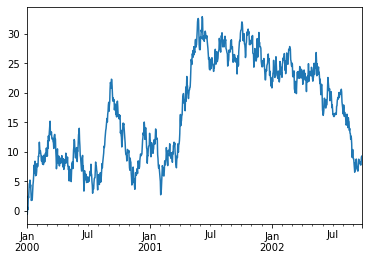

In [51]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

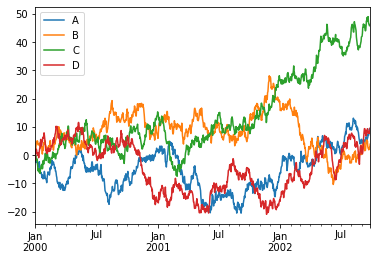

In [54]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')